# Exploring a `SegmentDataset` object created on the set of 192 replays from RLCS Worlds 2024

In [14]:
# Imports
from impulse import ReplayDataset
from impulse.preprocessing import SegmentedDataset
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
project_root = Path('/Users/david/dev/impulse')
data_dir = project_root / 'replays' / 'parsed'
db_path = project_root / 'impulse.db'

replay_dataset = ReplayDataset(db_path=str(db_path), data_dir=str(data_dir))

In [5]:
segmented_dataset = SegmentedDataset(replay_dataset, seed=42)

Found 192 parsed replays in database


In [24]:
all_train_segments = segmented_dataset.train_segments_list()
len(all_train_segments)

618

In [25]:
type(all_train_segments[0])

impulse.preprocessing.segmentation.ReplaySegment

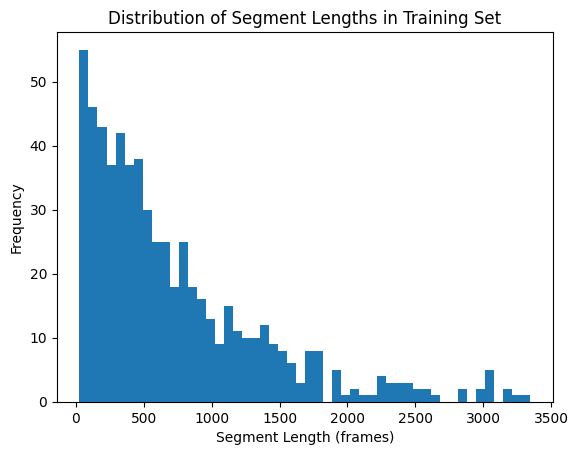

In [27]:
all_segment_lengths = [len(segment.frames) for segment in all_train_segments]

plt.hist(all_segment_lengths, bins=50)
plt.xlabel('Segment Length (frames)')
plt.ylabel('Frequency')
plt.title('Distribution of Segment Lengths in Training Set')
plt.show()

In [28]:
print('Segment length mean:', np.mean(all_segment_lengths))
print('Segment length median:', np.median(all_segment_lengths))
print('Segment length min:', np.min(all_segment_lengths))
print('Segment length max:', np.max(all_segment_lengths))

Segment length mean: 724.6472491909385
Segment length median: 518.5
Segment length min: 26
Segment length max: 3348


Let's cut out any segments shorter than 3 seconds or longer than 5 minutes. Since the dataset was parsed at 10 FPS, this corresponds to excluding segments shorter than 30 frames or longer than 3000 frames. 

We'll distinguish the original, unfiltered list of training segments from the filtered and further-processed list of segments by calling the former `all_train_segments` and the latter just `train_segments`. 

In [29]:
print('Number of training segments before filtering for length:', len(all_train_segments))
train_segments = [segment for segment in all_train_segments if 30 <= len(segment) <= 3000]
print('Number of training segments after filtering for length:', len(train_segments))

Number of training segments before filtering for length: 618
Number of training segments after filtering for length: 605


In [35]:
percent_cut = (len(all_train_segments) - len(train_segments))/len(all_train_segments) * 100 
round(percent_cut, 2)

2.1

This filter eliminated around 2.10% of the segments we originally had. 

Now that we've explored our data around the row dimension, let's look at the columns.

In [36]:
import random
random.seed(123)

rand_segment = random.choice(train_segments)
rand_segment.frames.head()

,frame,current time,frame time,seconds remaining,Ball - position x,Ball - position y,Ball - position z,Ball - linear velocity x,Ball - linear velocity y,Ball - linear velocity z,...,p5_angular velocity z,p5_quaternion x,p5_quaternion y,p5_quaternion z,p5_quaternion w,p5_boost level,p5_dodge active,p5_jump active,p5_double jump active,p5_player demolished by
0,298,58.385578,58.389545,273.0,43.189999,-24.400000,190.279999,1021.840027,-1049.959961,1739.790039,...,467.600006,0.109021,0.062912,0.776650,-0.617229,0.0,5.0,6.0,0.0,-1.0
1,299,58.485577,58.489544,273.0,162.179993,-146.660004,388.130005,1018.200012,-1046.180054,1657.859985,...,201.369995,0.105871,-0.206532,-0.643232,0.729649,0.0,5.0,6.0,0.0,-1.0
2,300,58.585575,58.589542,273.0,263.829987,-251.100006,550.130005,1015.080017,-1042.939941,1587.849976,...,37.970001,0.509246,-0.428783,-0.471520,0.578344,0.0,5.0,6.0,0.0,-1.0
3,301,58.685574,58.689541,272.0,365.170013,-355.220001,705.140015,1011.960022,-1039.699951,1518.069946,...,3.370000,0.685465,-0.552427,-0.300408,0.367039,0.0,5.0,6.0,0.0,-1.0
4,302,58.785572,58.789539,272.0,449.380005,-441.739990,828.989990,1009.359985,-1037.000000,1460.079956,...,-9.660000,0.761940,-0.615244,-0.129376,0.155514,0.0,5.0,6.0,0.0,-1.0


In [30]:
for seg in train_segments:
    seg.frames.dropna(axis=1, how='all', inplace=True)